# Pass Networks

In [27]:
# Importing the libraries
import pandas as pd
from mplsoccer.pitch import Pitch

In [28]:
# Loading the data
df = pd.read_csv('valladolidA.csv')
df

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,2248257153,1030,94,0.0,Barcelona,0.0,0.0,2,End,Successful,NaN,NaN,NaN
1674,2248257159,779,0,0.0,Valladolid,0.0,0.0,14,End,Successful,NaN,NaN,NaN
1675,2248257147,1031,0,0.0,Barcelona,0.0,0.0,14,End,Successful,NaN,NaN,NaN
1676,2248274127,1,0,0.0,Valladolid,0.0,0.0,16,FormationSet,Successful,NaN,NaN,NaN


In [29]:
df = df[df['teamId'] == 'Barcelona' ]
df

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,2248257083,1028,93,55.0,Barcelona,77.1,49.0,2,SavedShot,Successful,10.0,NaN,NaN
1671,2248257093,1029,93,57.0,Barcelona,86.9,49.6,2,CornerAwarded,Successful,10.0,NaN,NaN
1673,2248257153,1030,94,0.0,Barcelona,0.0,0.0,2,End,Successful,NaN,NaN,NaN
1675,2248257147,1031,0,0.0,Barcelona,0.0,0.0,14,End,Successful,NaN,NaN,NaN


In [30]:
df['passer'] = df['playerId']
df['recipient'] = df['playerId'].shift(-1)

passes = df[df['type'] == 'Pass']
success = passes[passes['outcome'] == 'Successful']
success

/tmp/ipykernel_16217/2285951454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['passer'] = df['playerId']
/tmp/ipykernel_16217/2285951454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recipient'] = df['playerId'].shift(-1)


,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2248256867,1018,93,14.0,Barcelona,76.7,31.8,2,Pass,Successful,8.0,76.7,43.0,8.0,10.0
1652,2248256869,1019,93,17.0,Barcelona,79.6,24.2,2,Pass,Successful,10.0,77.1,53.6,10.0,14.0
1653,2248256983,1020,93,18.0,Barcelona,77.1,56.4,2,Pass,Successful,14.0,69.0,56.9,14.0,44721.0
1654,2248256989,1021,93,20.0,Barcelona,68.3,55.2,2,Pass,Successful,44721.0,87.0,17.3,44721.0,2.0


In [31]:
subs = df[df['type'] == 'SubstitutionOff']
subs = subs['minute']
firstSub = subs.min()

In [32]:
pas = pd.to_numeric(success['passer'], downcast='integer')
rec = pd.to_numeric(success['recipient'], downcast='integer')

success['passer'] = pas
success['recipient'] = rec

success

/tmp/ipykernel_16217/655136329.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success['passer'] = pas
/tmp/ipykernel_16217/655136329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success['recipient'] = rec


,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2248256867,1018,93,14.0,Barcelona,76.7,31.8,2,Pass,Successful,8.0,76.7,43.0,8,10
1652,2248256869,1019,93,17.0,Barcelona,79.6,24.2,2,Pass,Successful,10.0,77.1,53.6,10,14
1653,2248256983,1020,93,18.0,Barcelona,77.1,56.4,2,Pass,Successful,14.0,69.0,56.9,14,44721
1654,2248256989,1021,93,20.0,Barcelona,68.3,55.2,2,Pass,Successful,44721.0,87.0,17.3,44721,2


In [33]:
# Average locations of players
avg_location = success.groupby('passer').agg({'x':['mean'],'y':['mean', 'count']})
avg_location.columns = ['x','y','count']
avg_location

,x,y,count
passer,,,
1,7.288235,48.794118,34
2,66.277273,12.131818,44
4,32.895833,43.518750,48
8,50.547170,43.944340,106
9,73.242857,55.414286,7
10,62.553247,45.253247,77
14,59.244444,63.655556,9
15,37.221127,74.295775,71
16,68.410526,68.071053,38


In [40]:
# Passes between players
pass_between = success.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'}, axis='columns', inplace=True)

pass_between = pass_between.merge(avg_location, left_on='passer', right_index= True)
pass_between = pass_between.merge(avg_location, left_on='recipient', right_index= True, suffixes=['','_end'])

pass_between = pass_between[pass_between['pass_count']>3]

pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
29,8,2,8,50.547170,43.944340,106,66.277273,12.131818,44
46,10,2,6,62.553247,45.253247,77,66.277273,12.131818,44
93,21,2,4,55.663636,52.263636,55,66.277273,12.131818,44
102,28,2,11,47.251724,17.100000,58,66.277273,12.131818,44
30,8,4,8,50.547170,43.944340,106,32.895833,43.518750,48
64,15,4,9,37.221127,74.295775,71,32.895833,43.518750,48
103,28,4,13,47.251724,17.100000,58,32.895833,43.518750,48
2,1,8,5,7.288235,48.794118,34,50.547170,43.944340,106
12,2,8,12,66.277273,12.131818,44,50.547170,43.944340,106
22,4,8,6,32.895833,43.518750,48,50.547170,43.944340,106


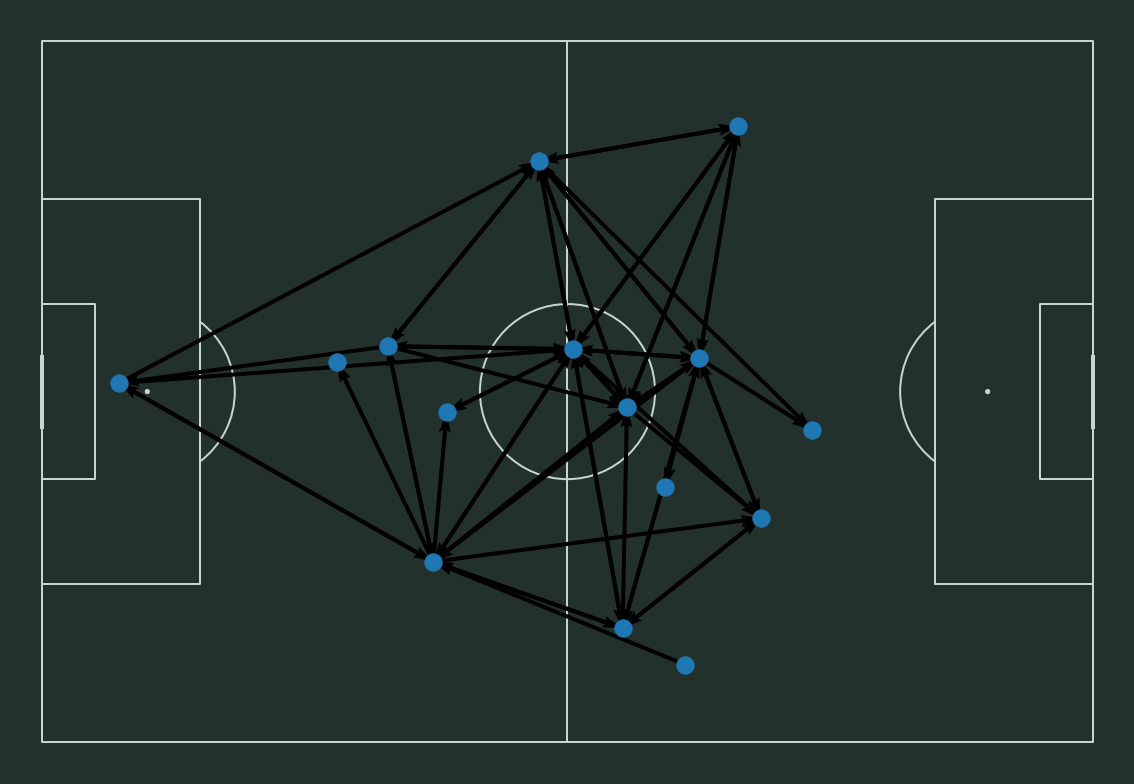

In [45]:
# PLotting the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

arrows = pitch.arrows(1.2*pass_between.x, .8*pass_between.y, 1.2*pass_between.x_end, .8*pass_between.y_end, ax=ax)

nodes = pitch.scatter(1.2*avg_location.x, .8*avg_location.y,s =300, ax=ax)